# Options and Monte-Carlo Methods

**Fall 2025 Quantitative Methods in Finance**

**The Erdős Institute**

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style('darkgrid')

In [13]:
def GBM_paths(S0, sigma, t, r, mu, n_sims, n_steps):
    """Simulates stock paths as geometric Brownian Motions
    Inputs:
    S0 (float): Underlying stock price at time 0
    sigma (float): Yearly volatility
    t (float): Time to expiration (years)
    r (float): Risk-free interest rate
    mu (float): Drift of log-returns
    n_sims (int): Number of simulated paths
    n_steps (int): Number of steps in each simulated path, each step interval has length t/n_steps
    
    Return (np.array): Array of stock paths
    """
    
    # Calculate time step size
    dt = t / n_steps
    
    # Generate random noise matrix (n_sims x n_steps)
    noise = np.random.normal(loc=0, scale=1, size=(n_sims, n_steps))
    
    # Calculate log returns for each time step
    log_returns = (mu + r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * noise
    
    # Cumulative sum along time axis (axis=1)
    cumulative_log_returns = np.cumsum(log_returns, axis=1)
    
    # Calculate stock prices using exponential transformation
    paths = S0 * np.exp(cumulative_log_returns)
    
    # Insert initial stock price at the beginning of each path
    paths_with_start = np.insert(paths, 0, S0, axis=1)
    
    return paths_with_start

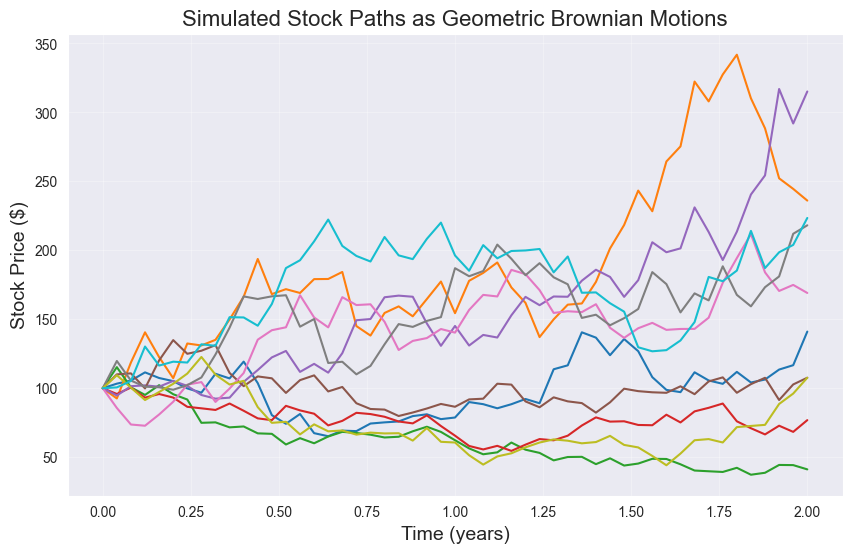

In [29]:
# Test GBM function

S0 = 100        # Initial stock price
sigma = 0.45    # Volatility
t = 2           # Time to expiration (years)
r = 0.035       # Risk-free rate
mu = 0.1        # Drift rate
n_sims = 10     # Number of simulations
n_steps = 50    # Number of time steps

# Create time array for plotting
time_steps = np.linspace(0, t, n_steps + 1)

# Generate stock paths
stock_paths = GBM_paths(S0, sigma, t, r, mu, n_sims, n_steps)

# Plot the paths
plt.figure(figsize=(10, 6))
for path in stock_paths:
    
    plt.plot(time_steps, path)

plt.title('Simulated Stock Paths as Geometric Brownian Motions', size=16)
plt.xlabel('Time (years)', size=14)
plt.ylabel('Stock Price ($)', size=14)
plt.grid(True, alpha=0.3)
plt.show()

## European Options

A **(European) call option** is a contract between two parties, a buyer and a seller, that gives the buyer the right, but not the obligation, to buy an underlying asset from the seller for a predetermined price 
$K$, called the strike price, at a future point in time.

A **(European) put option** is a contract between two parties, a buyer and a seller, that gives the buyer the right, but not the obligation, to sell an underlying asset to the seller for a predetermined price 
$K$, called the strike price, at a future point in time.

### Fair Market Price of an Option Contract

#### Call Options

Let $S_t$ denote the value of a stock at time $t$. Consider a call option on the stock with strike price $K$ that expires at time $t$. The value of the call option at the expiration time $t$ is 

$$\max(S_t-K,0).$$

The **fair market value** of the call option at time $0$ is the expected value of $\max(S_t-K,0)$ discounted to time $0$, i.e., 

$$C_0 = e^{-rt}\mathbb{E}[\max(S_t-K,0)].$$

#### Put Options

Let $S_t$ denote the value of a stock at time $t$. Consider a put option on the stock with strike price $K$ that expires at time $t$. The value of the put option at the expiration time $t$ is 

$$\max(K-S_t,0).$$

The **fair market value** of the put option at time $0$ is the expected value of $\max(K-S_t,0)$ discounted to time $0$, i.e., 

$$P_0 = e^{-rt}\mathbb{E}[\max(K-S_t,0)].$$

In [ ]:
# Plot Value of call option at expiration

# Set parameters
K = 100  # Strike price
stock_prices = np.linspace(50, 150, 100)  # Range of possible stock prices

# Calculate call option payoffs
call_payoffs = np.maximum(stock_prices - K, 0)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, call_payoffs, 'b-', linewidth=2, label='Call Option Payoff')
plt.axvline(x=K, color='r', linestyle='--', alpha=0.7, label=f'Strike Price = ${K}')
plt.xlabel('Stock Price at Expiration ($)', size=12)
plt.ylabel('Option Payoff ($)', size=12)
plt.title('Call Option Payoff at Expiration', size=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [ ]:
# Plot Value of put option at expiration

# Use same parameters as call option
K = 100  # Strike price
stock_prices = np.linspace(50, 150, 100)  # Range of possible stock prices

# Calculate put option payoffs
put_payoffs = np.maximum(K - stock_prices, 0)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, put_payoffs, 'r-', linewidth=2, label='Put Option Payoff')
plt.axvline(x=K, color='r', linestyle='--', alpha=0.7, label=f'Strike Price = ${K}')
plt.xlabel('Stock Price at Expiration ($)', size=12)
plt.ylabel('Option Payoff ($)', size=12)
plt.title('Put Option Payoff at Expiration', size=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

### Option pricing via Monte-Carlo Methods

If we assume a model of stock prices $S_t$, then we can use Monte-Carlo methods to estimate the values 

$$C_0 = e^{-rt}\mathbb{E}[\max(S_t-K,0)]$$

and 

$$P_0 = e^{-rt}\mathbb{E}[\max(K-S_t,0)].$$

In [ ]:
# Plot simulated paths with horizontal strike price

# Parameters for simulation
S0 = 100
sigma = 0.3
t = 1
r = 0.05
mu = 0.1
n_sims = 20
n_steps = 252
K = 105  # Strike price

# Generate paths
paths = GBM_paths(S0, sigma, t, r, mu, n_sims, n_steps)
time_steps = np.linspace(0, t, n_steps + 1)

# Plot
plt.figure(figsize=(12, 7))
for i, path in enumerate(paths):
    plt.plot(time_steps, path, alpha=0.7, linewidth=1)

plt.axhline(y=K, color='red', linestyle='--', linewidth=2, label=f'Strike Price = ${K}')
plt.xlabel('Time (years)', size=12)
plt.ylabel('Stock Price ($)', size=12)
plt.title(f'{n_sims} Simulated Stock Price Paths with Strike Price', size=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

print(f"Final stock prices range: ${paths[:, -1].min():.2f} - ${paths[:, -1].max():.2f}")
print(f"Number of paths ending above strike price: {np.sum(paths[:, -1] > K)}/{n_sims}")

In [ ]:
#Increase number of simulations to decrease standard error of estimate


In [ ]:
#Examine impact of spot prices on the estimated price of a call option


In [ ]:
#Examine impact of strike price on the estimated price of a call option


In [ ]:
#Examine impact of volatility on the estimated price of a call option


In [ ]:
#Examine impact of time to expiration on the estimated price of a call option


In [ ]:
# Examine the impact of risk-free interest rates to call option value


In [ ]:
### Create a histogram of distribution of call payoffs


### Remark on drift terms in stock path modeling and options

It is natural to suspect that drift terms in a stock model, under Geometric Brownian modeling, would impact the expected value of a call option.


This is indeed the case, if **hedging** is not used as a strategy in risk management. Hedging an option portfolio has the effect of neutralizing drift in stock returns.

In [ ]:
# Examine the impact of different drift terms in option pricing without hedging


## Hedging

The process of hedging an option, from a market-makers point of view, is the process of selling option contracts, and then buying and selling the underlying stock over the interval of time to expiration, and is done so to neutralize the risk of big losses and to protect profits obtained from the premium gathered from selling options.

In [ ]:
# Examine the profit distribution of selling 100
#call options with no hedge versus selling 100 call options and buying 50 shares of stock at
#time 0.
